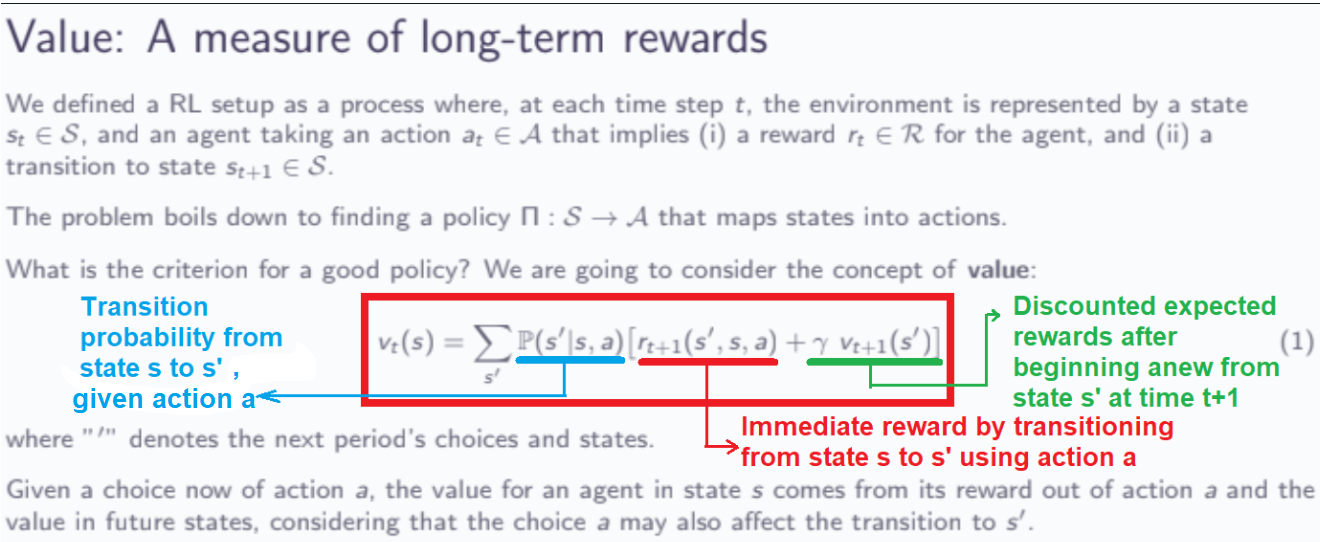

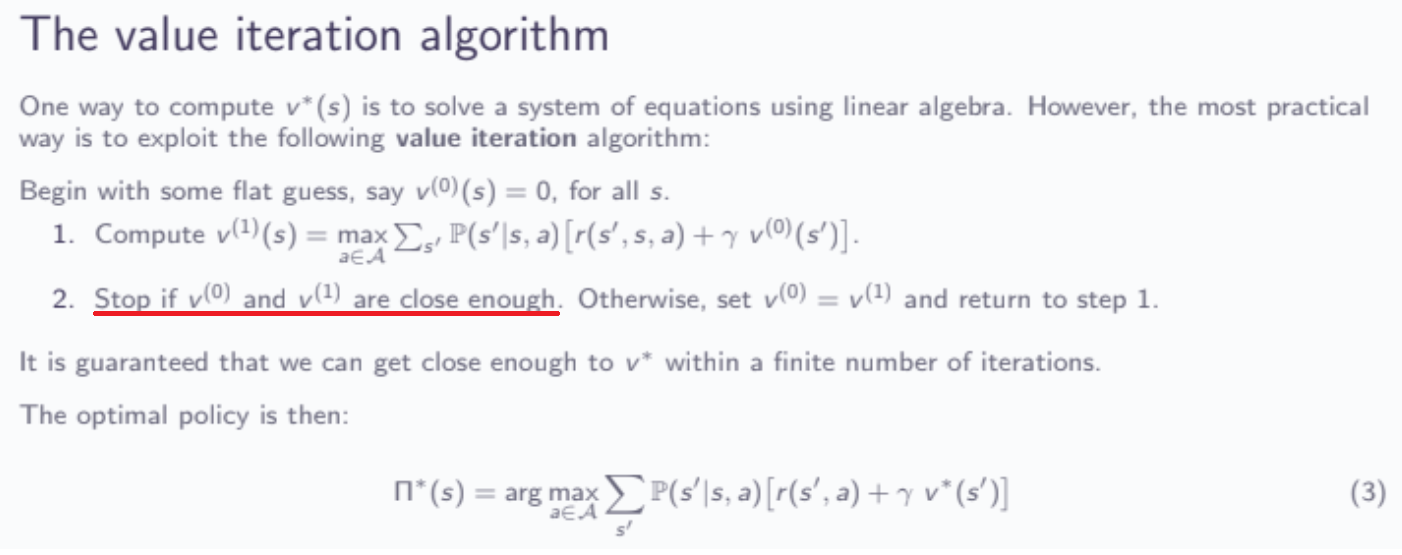

## **1. REINFORCEMENT LEARNING: DYNAMIC PROGRAMMING**

### **1.2 The Value Function**

From the previous module, notice that we defined a Reinforcement Learning setup as a process where, at each time step $t$, the environment is represented by a *state* $s_t\in\mathcal{S}$, an agent taking an action $a_t\in\mathcal{A}$ that implies (i) a reward $r_t\in\mathcal{R}$ for the agent, and (ii) a transition to state $s_{t+1}\in\mathcal{S}$. Assuming the Markov property, we have that:
*   $\mathbb{P}(s_{t+1}|s_{t},a_{t})=\mathbb{P}(s_{t+1}|s_{t},a_{t},...,s_{0},a_{0})$
*   $\mathbb{P}(r_{t}|s_{t},a_{t})=\mathbb{P}(r_{t}|s_{t},a_{t},...,s_{0},a_{0})$

This RL framework that imposes the Markov property is known as a Markov Decision Process (MDP). The agent must make decisions in a sequential manner, under what objective? The problem boils down to finding a policy $\Pi: \mathcal{S}\rightarrow\mathcal{A}$ that maps states into actions. We must find an action that is best to take now for each current realization of the state. Due to the Markov property, we must only take care of the current state and we can forget about past realizations.

What is the criterion to find a good policy? The key idea of DP, and of RL generally, is the use of value functions to organize and structure the search for good policies. In a dynamic environment, we should not just care about the current reward, so the problem is more complicated than choosing $a_t$ to maximize $r_t$. Indeed, we are going to consider an intertemporal criterion, defined as value:
$$
\begin{align}
v_t(s) = \sum_{s'}\mathbb{P}(s'|s,a) \big[ r_{t+1}(s',s,a) + \gamma\ v_{t+1}(s') \big]
\end{align}
$$
where "$'$" denotes the next period's choices and states. That is, given a choice now of action $a$, the value for an agent in state $s$ comes from its reward out of action $a$ and the value in future states, considering that the choice $a$ may also affect the future state $s'$. The parameter $\gamma\in(0,1)$ captures the extent to which current rewards are more relevant relative to more distant ones, i.e., it is a measure of the agent's patience. We can also refer to $\gamma$ as the *discount factor* of the agent.

Although we are going to cover a wide range of problems, let's first consider stationary problems with infinite-horizon. This means that the agent will take actions forever, albeit possibly with some terminal state(s). In a stationary setup, whenever the agent has stepped into state $s$, the expected length of the agent's life is the same as it was the previous time it reached $s$, and so the behavior is the same. With a stationary problem, we can get rid of the subindex $t$ in the value function:
$$
\begin{align}
v(s) = \sum_{s'}\mathbb{P}(s'|s,a) \big[ r(s',s,a) +  \gamma\ v(s') \big]
\end{align}
$$
Thus, the best policy would lead to the function:
$$
\begin{align}
v^*(s) = \underset{a\in\mathcal{A}}{\max}\sum_{s'}\mathbb{P}(s'|s,a) \big[ r(s',s,a) + \gamma\ v^*(s') \big]
\end{align}
$$
$v^*(s)$ is the optimal value function. The optimal value of a state $s$ is the maximum over all actions the agent can take including the current period's reward and the next state's optimal value. The idea is that, in every state, we want to choose the action that maximizes the value of the future.

Let $N$ denote the number of possible states in the Markov chain of the DP problem. <u> Notice that the equation above defines a system of $N$ equations, **one for each state**, and $N$ unknowns, each $v^*(s)$ </u>. Banach's fixed-point theorem guarantees that there exists a single optimal policy $v^*(s)$ for each $s$.

The optimal policy is, then:
$$
\begin{align}
\Pi^*(s) = \arg\underset{a\in\mathcal{A}}{\max}\sum_{s'}\mathbb{P}(s'|s,a) \big[  r(s',a) +  \gamma\ v^{*}(s')\big]
\end{align}
$$
### 1.3 Value Iteration

How do we compute $v^*$? One way is to solve the system of equations using linear algebra. However, the most practical way is to exploit the following value iteration algorithm:

Begin with some flat guess, say $v^{(0)}(s)=0$, for all $s$.
1. Compute $v^{(1)}(s) = \underset{a\in\mathcal{A}}{\max}\sum_{s'}\mathbb{P}(s'|s,a)\big[  r(s',s,a) +  \gamma\ v^{(0)}(s')\big]$.
2. Stop if $v^{(0)}$ and $v^{(1)}$ are close enough. Otherwise, set $v^{(0)}=v^{(1)}$ and return to step 1.

It is guaranteed that we can get close enough to $v^*$ within a finite number of iterations.

## 2. Optimal timing to sell an asset

Consider an investor that owns a financial asset, whose dividends $s_t\geq 0$ fluctuate randomly according to a Markov process that takes values in $\{s_1,...,s_N\}$, with $s_1=0$ being an absorbing state (say, bankruptcy and liquidation), and $s_i<s_{i+1}$ for $i=1,2,...,N$.

Suppose that the dividend Markov process is defined by the following transition matrix:
$$
\begin{align}
& \mathbb{P}(s_i|s_{i-1}) = \mathbb{P}(s_i|s_{i+1}) = 0.5\ \text{for}\ i=2,...,N-1 \\
& \mathbb{P}(s_{1}|s_{1}) = \mathbb{P}(s_{N-1}|s_{N}) = 1
\end{align}
$$
That is, at each date, dividends go up or down one step with equal probability, and the process always bounces back once it has reached the maximum level of dividends. As mentioned above, the state $s_1$ is absorbing.

An investor (the agent) currently holds the asset. At each point in time, the investor must choose to either hold the asset or sell it at a price $\ell$ to other investors, in which case the stream of dividends stops. Therefore, the action space is $\mathcal{A}=\{hold,sell\}$, and the rewards for the investor are $r(s)=s$ when the investor holds, $r(s)=\ell$ when the asset is sold, and $r(s)=0$ thereafter. Therefore, this means that $\mathbb{P}(s_i|s_j,sell)=0$ for all $j$ and $i\neq 1$, and $\mathbb{P}(s_1|s_j,sell)=1$ for all $j$. In contrast, the investor's actions leave the underlying Markov process unchanged unless they decide to sell the asset, formally $\mathbb{P}(s'|s,hold)=\mathbb{P}(s'|s)$.

Let's find the optimal solution to this problem through value iteration.

In [300]:
# Import libraries to use in this notebook
import matplotlib.pyplot as plt
import numpy as np

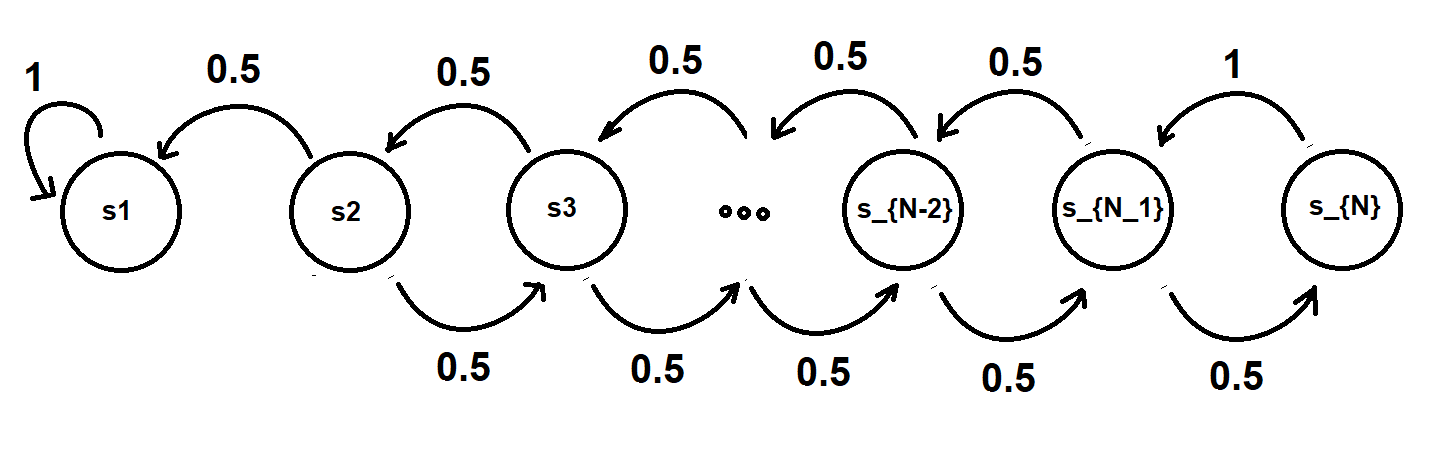

In [301]:
# SOLVING THE INVESTOR'S PROBLEM
# Step 1. Set up the dividend Markov process
N = 11  # Number of dividend states
A = (0, 1)  # action space, 0 is hold, 1 is sell
S_MIN = 0.0  # Minimum dividend
S_MAX = 10.0  # Maximum dividend
S_GRID = np.linspace(S_MIN, S_MAX, N)[np.newaxis, :]  # Array of possible dividend realizations

# Transition matrix
P = np.zeros((N, N))

# absorbing state, which always transitions to itself
P[0, 0]  = 1
P[0, 1:] = 0

# last state, which always transitions into the previous state
P[-1, -2] = 1
P[-1, -1] = 0
P[-1, :-2] = 0

for s in range(1, N-1):
    P[s, s-1] = 0.5
    P[s, s+1] = 0.5

In [302]:
S_GRID  # dividend payments

array([[ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]])

In [303]:
S_GRID.shape

(1, 11)

In [304]:
# SOLVING THE INVESTOR'S PROBLEM
# Step 2. Set up the parameters of the DP problem
gamma = 0.75
sellprice = 15.0  # sell price

epsilon = 1e-4
max_iterations = 200

In [305]:
# rewards tensor
R = np.repeat(S_GRID, N, axis=0)

"""
If you sell, you automatically go to state 0 with probability 1.
"""
R

array([[ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.],
       [ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.],
       [ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.],
       [ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.],
       [ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.],
       [ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.],
       [ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.],
       [ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.],
       [ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.],
       [ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.],
       [ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]])

In [306]:
# SOLVING THE INVESTOR'S PROBLEM
# Step 1. Set up the dividend Markov process
N = 11  # Number of dividend states
A = (0, 1)  # action space, 0 is hold, 1 is sell
S_MIN = 0.0  # Minimum dividend
S_MAX = 10.0  # Maximum dividend
S_GRID = np.linspace(S_MIN, S_MAX, N)[np.newaxis, :]  # Array of possible dividend realizations

# Transition matrix
P = np.zeros((N, N))

# absorbing state, which always transitions to itself
P[0, 0]  = 1
P[0, 1:] = 0

# last state, which always transitions into the previous state
P[-1, -2] = 1
P[-1, -1] = 0
P[-1, :-2] = 0

for s in range(1, N-1):
    P[s, s-1] = 0.5
    P[s, s+1] = 0.5

print("P:\n", P)

# rewards array
R = np.repeat(S_GRID, N, axis=0)  # assuming hold

# SOLVING THE INVESTOR'S PROBLEM
# Step 2. Set up the parameters of the DP problem
gamma = 0.75
sellprice = 15.0  # sell price

epsilon = 1e-4
max_iterations = 200

P:
 [[1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. ]
 [0.5 0.  0.5 0.  0.  0.  0.  0.  0.  0.  0. ]
 [0.  0.5 0.  0.5 0.  0.  0.  0.  0.  0.  0. ]
 [0.  0.  0.5 0.  0.5 0.  0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.5 0.  0.5 0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0.5 0.  0.5 0.  0.  0.  0. ]
 [0.  0.  0.  0.  0.  0.5 0.  0.5 0.  0.  0. ]
 [0.  0.  0.  0.  0.  0.  0.5 0.  0.5 0.  0. ]
 [0.  0.  0.  0.  0.  0.  0.  0.5 0.  0.5 0. ]
 [0.  0.  0.  0.  0.  0.  0.  0.  0.5 0.  0.5]
 [0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0. ]]


In [307]:
# Iteration
def v(s):
    v = 0  # initialize value function value to 0.
    iter_count = 0
    for i in range(max_iterations):
        iter_count += 1
        # print(f"---- Iteration {i} ----")
        v_old = v
        v = np.maximum((P[s, :] * (R[s, :] + gamma*v_old)).sum(), sellprice)
        # print("P[s, :] * (R[s, :] =", P[s, :] * (R[s, :]))
        # print("    v =", np.round(v, 2))
        
        if np.abs(v - v_old).max() < epsilon:
            print("Iteration count:", iter_count)
            if v == sellprice:
                print("Optimal policy: SELL")
            else:
                print("Optimal policy: HOLD")
            return v

In [308]:
np.set_printoptions(precision=2, suppress=True)

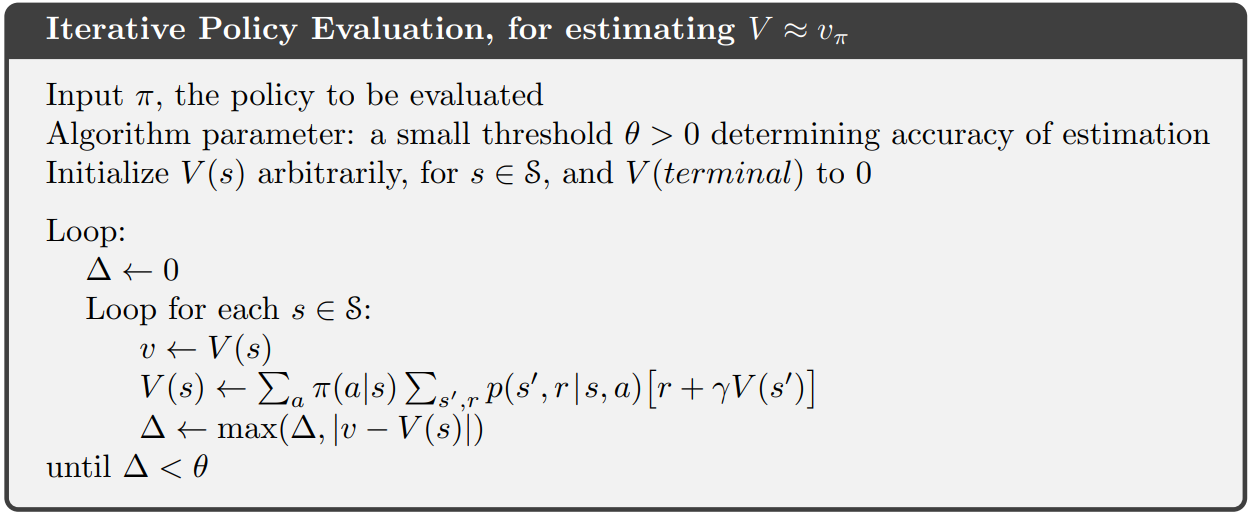

In [309]:
def value_iteration():
    v = np.zeros(N)  # Initialize value function for all states
    policy = np.zeros(N, dtype=int)  # Policy initialization (0 = hold, 1 = sell)

    for i in range(max_iterations):
        v_old = v.copy()
        for s in range(N):
            hold_value = np.dot(P[s, :], R[s, :] + gamma * v_old)
            sell_value = sellprice
            v[s] = max(hold_value, sell_value)
            policy[s] = np.argmax([hold_value, sell_value])
        
        # Check convergence
        if np.max(np.abs(v - v_old)) < epsilon:
            print(f"Converged after {i+1} iterations")
            break

    return v, policy

v, policy = value_iteration()
print("v =")
print(v)
print("policy =")
print(policy)

Converged after 37 iterations
v =
[15.   15.   15.   15.14 17.38 20.53 24.04 27.58 30.83 33.3  33.98]
policy =
[1 1 1 0 0 0 0 0 0 0 0]


<>:8: SyntaxWarning: invalid escape sequence '\p'
<>:14: SyntaxWarning: invalid escape sequence '\p'
<>:8: SyntaxWarning: invalid escape sequence '\p'
<>:14: SyntaxWarning: invalid escape sequence '\p'
C:\Users\adevr\AppData\Local\Temp\ipykernel_12912\3790490601.py:8: SyntaxWarning: invalid escape sequence '\p'
  axs[1].set_title("$\pi(s)$, optimal policy given state s")
C:\Users\adevr\AppData\Local\Temp\ipykernel_12912\3790490601.py:14: SyntaxWarning: invalid escape sequence '\p'
  axs[1].set_ylabel("$\pi(s)$")


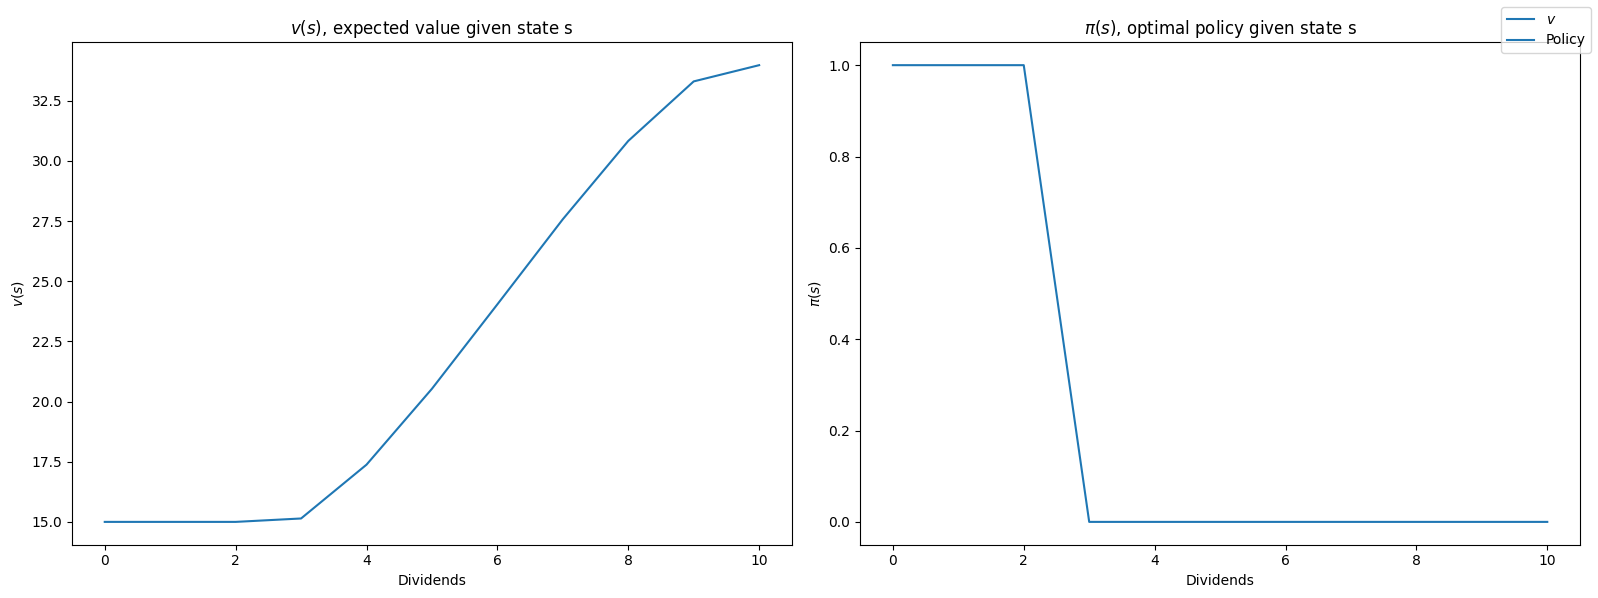

In [310]:
# Plotting

fig, axs = plt.subplots(1, 2, figsize=(16, 6))
axs[0].plot(S_GRID.flatten(), v, label="$v$")
axs[1].plot(S_GRID.flatten(), policy, label="Policy")

axs[0].set_title("$v(s)$, expected value given state s")
axs[1].set_title("$\pi(s)$, optimal policy given state s")

axs[0].set_xlabel("Dividends")
axs[1].set_xlabel("Dividends")

axs[0].set_ylabel("$v(s)$")
axs[1].set_ylabel("$\pi(s)$")

fig.tight_layout()
fig.legend()